<a href="https://colab.research.google.com/github/NehaKoppikar/BTDSS6DL/blob/master/Test/Test1_J2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset
1.MNIST <br>
2.Fashion MNIST <br>
3.CIFAR 10 <br>
4.CIFAR 100 <br>
5.IRIS

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# MNIST

## Build Neural Network to get CV accuracy (~100%)

In [11]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 7s 116us/step - loss: 0.2384 - acc: 0.9299 - val_loss: 0.1314 - val_acc: 0.9614
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1017 - acc: 0.9693 - val_loss: 0.0880 - val_acc: 0.9729
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0659 - acc: 0.9801 - val_loss: 0.0737 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0462 - acc: 0.9863 - val_loss: 0.0665 - val_acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0329 - acc: 0.9907 - val_loss: 0.0721 - val_acc: 0.9766
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0238 - acc: 0.9934 - val_loss: 0.0658 - val_acc: 0.9794
Epoch 7/10
60000

## Plot history :- epochs vs loss  on training, test data epochs vs accuracy

In [15]:
#Training
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1792/60000 [..............................] - ETA: 6s - loss: 0.0062 - acc: 0.9978

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 105us/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0640 - val_acc: 0.9829
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0670 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0659 - val_acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.0679 - val_acc: 0.9828
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0700 - val_acc: 0.9830
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 8.7023e-04 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9826
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0746 - val_acc: 0.9814
Epoch 8/10
60000/60000 [=================

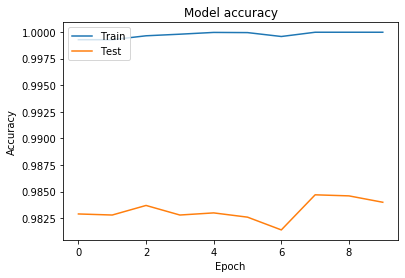

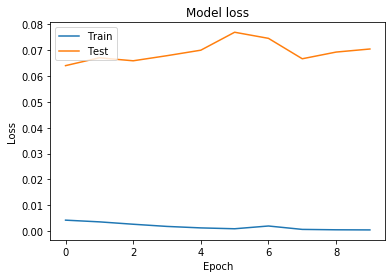

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Obtain model summary

In [19]:
#Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


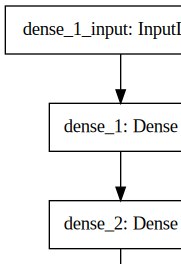

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Use data augmentation

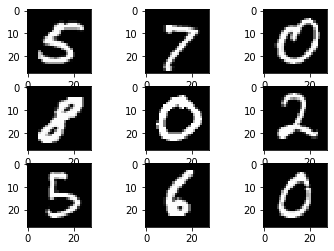

In [23]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [32]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

#Model building
initializer = keras.initializers.Identity(gain=1.0)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

ValueError: ignored

# Fashion MNIST

In [24]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2351 - acc: 0.9309 - val_loss: 0.1141 - val_acc: 0.9668
Epoch 2/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0975 - acc: 0.9706 - val_loss: 0.0834 - val_acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0636 - acc: 0.9799 - val_loss: 0.0758 - val_acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0697 - val_acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0318 - acc: 0.9901 - val_loss: 0.0727 - val_acc: 0.9774
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0621 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0166 - acc: 0.9957 - val_loss: 0.0598 - 

In [25]:
#Training
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1664/60000 [..............................] - ETA: 6s - loss: 0.0025 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 107us/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.0687 - val_acc: 0.9830
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.0649 - val_acc: 0.9838
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0694 - val_acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0665 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9832
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 9.9721e-04 - acc: 0.9999 - val_loss: 0.0679 - val_acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0727 - val_acc: 0.9831
Epoch 8/10
60000/60000 [=================

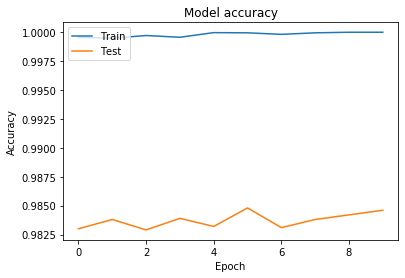

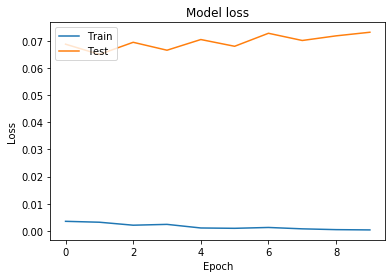

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
#Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


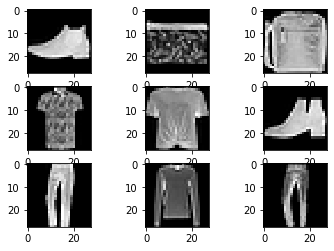

In [29]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images1')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images1', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

# CIFAR 10

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])